In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import tt_ind_solve_power
from scipy.stats import ttest_ind

In [202]:
def check_ttest(a, b, alpha=0.05):
    _, pvalue = ttest_ind(a, b)
    return int(pvalue < alpha)

In [213]:
mu = 100
std = 50
alpha = 0.05
beta = 0.2
effect_size = 1.05
effect_sizes = np.linspace(1.01, 1.09, 9)

# standardized effect size, difference between the two means divided
# by the standard deviation. `effect_size` has to be positive.
standardized_effect_size = (effect_size - 1) * mu / std
sample_size = tt_ind_solve_power(effect_size=standardized_effect_size,
                                nobs1=None,
                                alpha=alpha,
                                power=1 - beta,
                                ratio=1.0,
                                alternative='two-sided')
sample_size = int(np.ceil(sample_size))

print(f'sample_size = {sample_size}')

errors = []
for effect_size in effect_sizes:
    ab_results = []
    for _ in range(3000):
        a = np.random.normal(loc=mu,
                             scale=std,
                             size=sample_size)
        b = np.random.normal(loc=mu*effect_size,
                             scale=std,
                             size=sample_size )

        ab_results.append(check_ttest(a, b))
    errors.append(1 - np.mean(ab_results))

sample_size = 1571


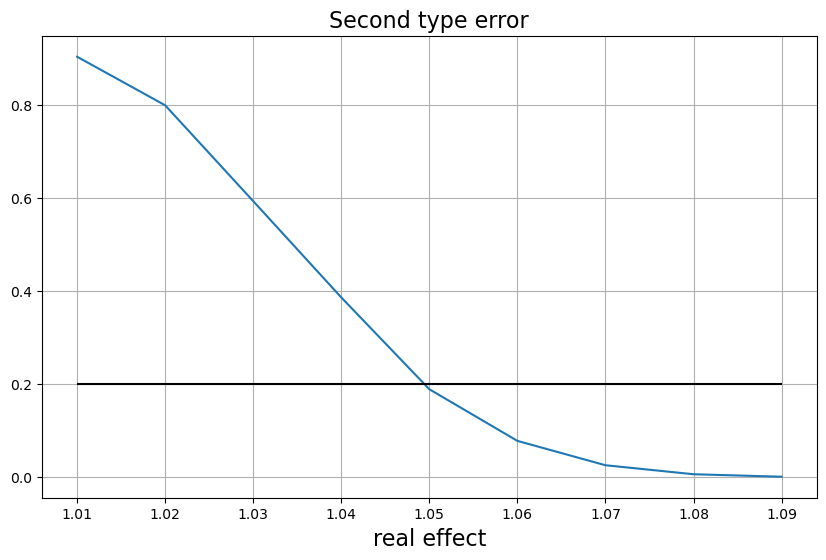

In [214]:
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, errors)
plt.title('Second type error', fontsize=16)
plt.hlines(0.2, 1.01, 1.09, color ='black')
plt.xlabel('real effect', fontsize=16)
plt.grid()
plt.show()

Для эффекта в 5% был посчитан размер выборки(sample_size), затем, используя этот размер выборки, моделируется ситуация с различнымы размерами эффекта
Если дизайн эксперимента верен, при эффекте 5%  мощность теста соответствует 80%. В случае если мы ошиблись в эффекте на 1%, думали будет 5%, а оказалось 4%, то это увеличивает ошибку второго рода в два раза, с 20% до 40%.

Если есть возможность, лучше собирать данные с запасом.